In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.model_selection import train_test_split,ShuffleSplit
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain

In [2]:
df = pd.read_csv("/content/Wine_clust.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.shape

(178, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [11]:
corr_matrix = df.corr()

[]

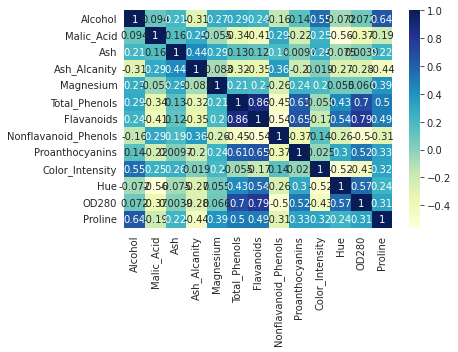

In [12]:
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.plot()

Alcohol                     Axes(0.125,0.71587;0.168478x0.16413)
Malic_Acid               Axes(0.327174,0.71587;0.168478x0.16413)
Ash                      Axes(0.529348,0.71587;0.168478x0.16413)
Ash_Alcanity             Axes(0.731522,0.71587;0.168478x0.16413)
Magnesium                  Axes(0.125,0.518913;0.168478x0.16413)
Total_Phenols           Axes(0.327174,0.518913;0.168478x0.16413)
Flavanoids              Axes(0.529348,0.518913;0.168478x0.16413)
Nonflavanoid_Phenols    Axes(0.731522,0.518913;0.168478x0.16413)
Proanthocyanins            Axes(0.125,0.321957;0.168478x0.16413)
Color_Intensity         Axes(0.327174,0.321957;0.168478x0.16413)
Hue                     Axes(0.529348,0.321957;0.168478x0.16413)
OD280                   Axes(0.731522,0.321957;0.168478x0.16413)
Proline                       Axes(0.125,0.125;0.168478x0.16413)
dtype: object

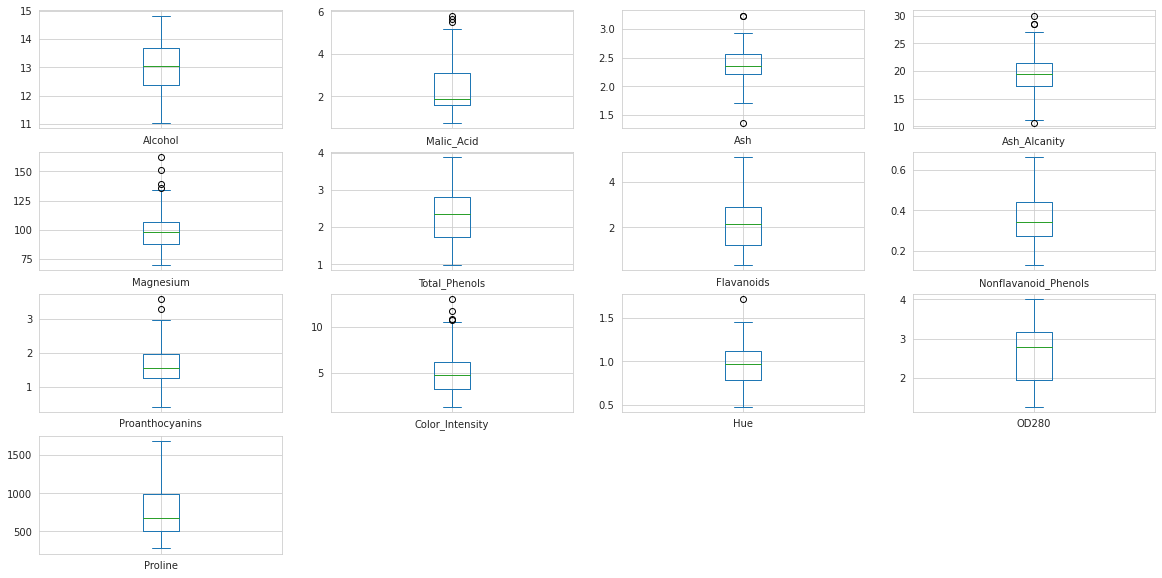

In [13]:
df.plot(kind='box',subplots='True',layout=(4,4),sharex=False,figsize=(20, 10))

In [17]:
def IQR_OutlierRemoval(new_df):  
    Q1 = new_df.quantile(0.25)
    Q3 = new_df.quantile(0.75)
    IQR = Q3 - Q1

    new_df = new_df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return new_df

df2 = df.copy()

print(df2.shape)

(178, 13)


In [19]:
df2 = IQR_OutlierRemoval(df2) #outlier removal
df2.shape

(161, 13)

<Axes: >

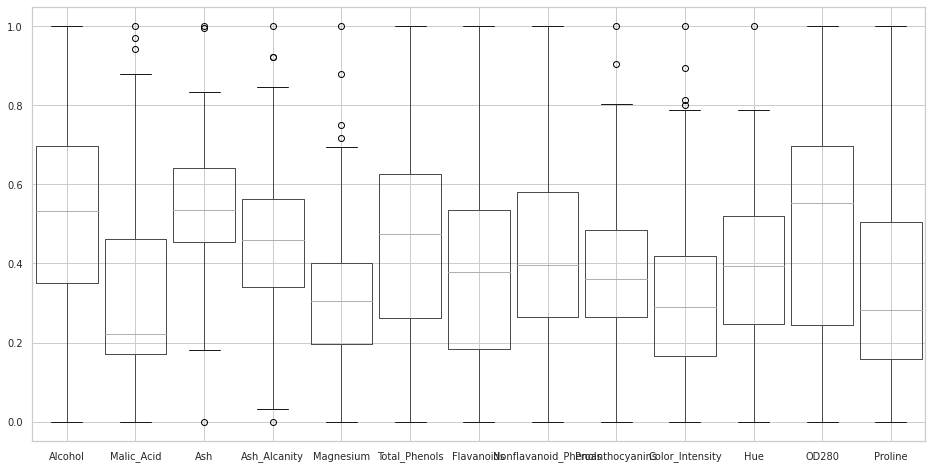

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df2) 
df2.loc[:,:] = scaled_values

sns.set(rc={'figure.figsize':(16,8)}, font_scale=0.9, style='whitegrid')
df2.boxplot(widths = 0.9)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2 = sc.fit_transform(df2)

KMeans Clustering

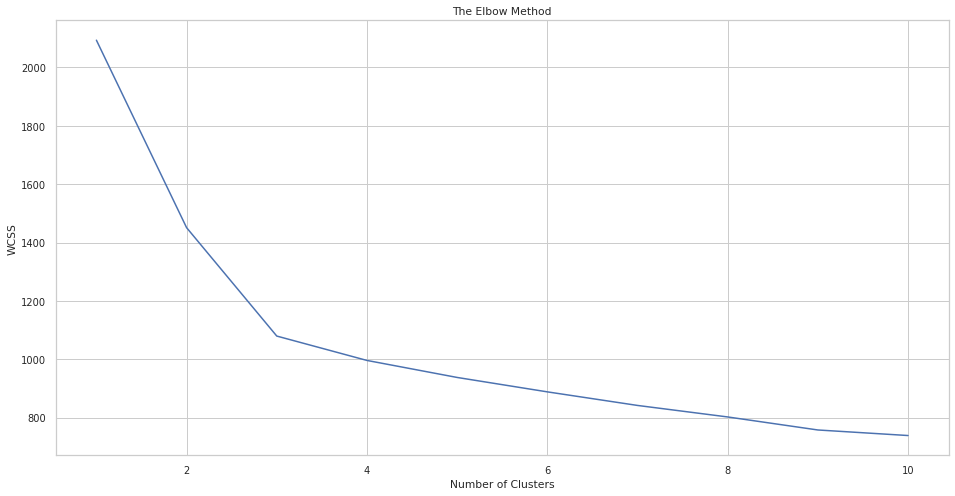

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  kmeans.fit(df2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss, scalex=True)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
y = kmeans.fit_predict(df2)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [23]:
import plotly.express as px
clusters=pd.DataFrame(df2,columns=df.columns)
clusters['label']=kmeans.labels_
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green'])


In [27]:
import scipy.cluster.hierarchy as sch

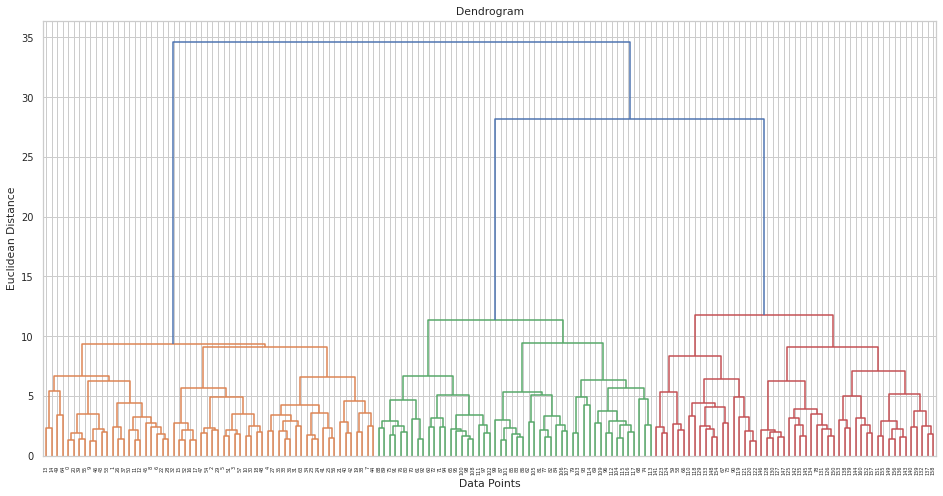

In [28]:
dendrogram = sch.dendrogram(sch.linkage(df2,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

*Agglomerative* Clustering:



In [29]:
from sklearn.cluster import AgglomerativeClustering
ahc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_ahc = ahc.fit_predict(df2)

In [30]:
y_ahc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [31]:
from sklearn.metrics import silhouette_score
sil_ahc = silhouette_score(df2,y_ahc)

In [32]:
sil_ahc

0.2926994028296366

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

df4 = df2.copy()

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df4) 

nr_clusters = []
n_clusters = range(2, 10)
ag_sil_score = [] 

for p in n_clusters:
    ag = AgglomerativeClustering(n_clusters=p).fit(df4)
    nr_clusters.append((len(np.unique(ag.labels_))))
    ag_sil_score.append(silhouette_score(df4, ag.labels_))
    
results = pd.DataFrame([n_clusters, nr_clusters, ag_sil_score], index=['n_clusters','clusters', 'sil_score']).T
results.sort_values(by='sil_score', ascending=False).head() 
     

,n_clusters,clusters,sil_score
1,3.0,3.0,0.292699
0,2.0,2.0,0.260940
2,4.0,4.0,0.234931
4,6.0,6.0,0.202754
3,5.0,5.0,0.202068


DB SCAN

In [26]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(df2)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 161
